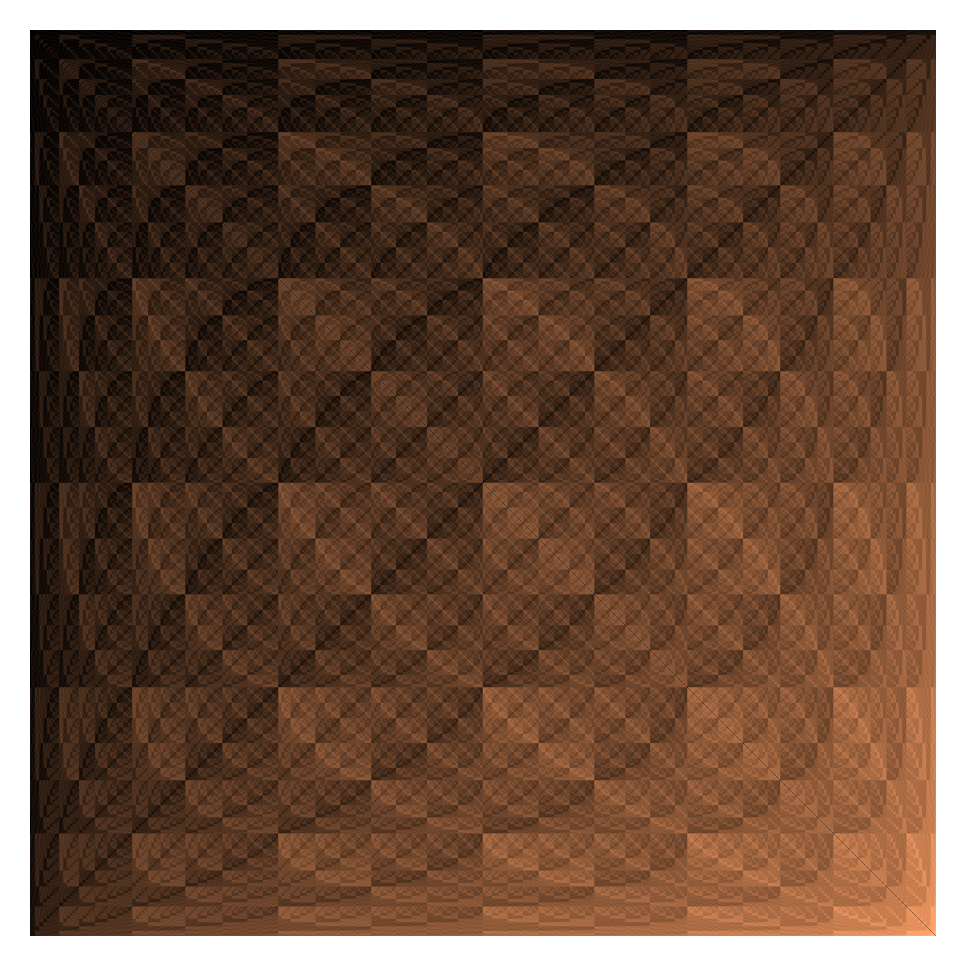

In [ ]:
from itertools import chain, combinations

def m_show(m, size = 4, cmap = 'copper'):
    import matplotlib.pyplot as plt
    from numpy import array
    cmaps =  ['binary', 'gist_yarg', 'gist_gray', 'gray', 'bone',
                'pink', 'spring', 'summer', 'autumn', 'winter', 'cool',
                'Wistia', 'hot', 'afmhot', 'gist_heat', 'copper']
    plt.figure(num = None, figsize=(size, size), dpi=300)
    plt.axis('off')
    plot = plt.imshow(array(m), cmap = cmap) #, interpolation='bicubic' )
    plt.show()
    plt.close()


def print_m(M):
    print('[' + ',\n '.join(map(str, M)) + ']\n' )

def powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(1, len(s)+1 ))


def get_a_in_b(a,b):
    c = 0
    for i in a:
        if i in b:
            c+=1
    return c

def get_matrix(s):
    n = len(s)
    mat =  [[0]*n for i in range(n)]
    
    for x in range(0, n):
        for y in range(0, n):
            if x == y:
                mat[x][y] = 0

            # mat[x][y] = get_a_in_b(s[x], s[y]) 

            if x < y:
                mat[x][y] = get_a_in_b(s[x], s[y]) 
            if x > y:
                mat[x][y] = get_a_in_b(s[y], s[x]) 
    return mat

from random import shuffle

big_n = 11
pows = list(powerset(range(1, big_n+1)))
pows = [ i for i in pows if 1 <= len(i) <= 100]
#shuffle(pows)

adj_m = get_matrix(pows)

m_show(adj_m)




In [ ]:
from itertools import chain, combinations

def m_show(m, size = 4, cmap = 'twilight_shifted'):
    import matplotlib.pyplot as plt
    from numpy import array
    cmaps =  ['binary', 'gist_yarg', 'gist_gray', 'gray', 'bone',
                'pink', 'spring', 'summer', 'autumn', 'winter', 'cool',
                'Wistia', 'hot', 'afmhot', 'gist_heat', 'copper']
    plt.figure(num = None, figsize=(size, size), dpi=300)
    plt.axis('off')
    plot = plt.imshow(array(m), cmap = cmap) #, interpolation='bicubic' )
    plt.show()
    plt.close()

def numberToBase(n, b):
    if n == 0:
        return [0]
    digits = []
    while n:
        digits.append(int(n % b))
        n //= b
    return ''.join(map(str, digits[::-1]))


from tqdm import tqdm 

def get_matrix_bin(s):
    n = len(s)
    mat =  [[0]*n for i in range(n)]
    for x in tqdm(range(0, n)):
        for y in range(0, x):
            f = numberToBase((s[x] & s[y]), 3).count('01')
            mat[x][y] = f
            mat[y][x] = f
    return mat

big_n = 11

pows = [i for i in range(0, 2**big_n)]
pows = sorted(pows, key = lambda k: numberToBase(k, 3).count('10'))
adj_m = get_matrix_bin(pows)

m_show(adj_m)




Output hidden; open in https://colab.research.google.com to view.

100%|██████████| 100/100 [00:00<00:00, 3102.20it/s]


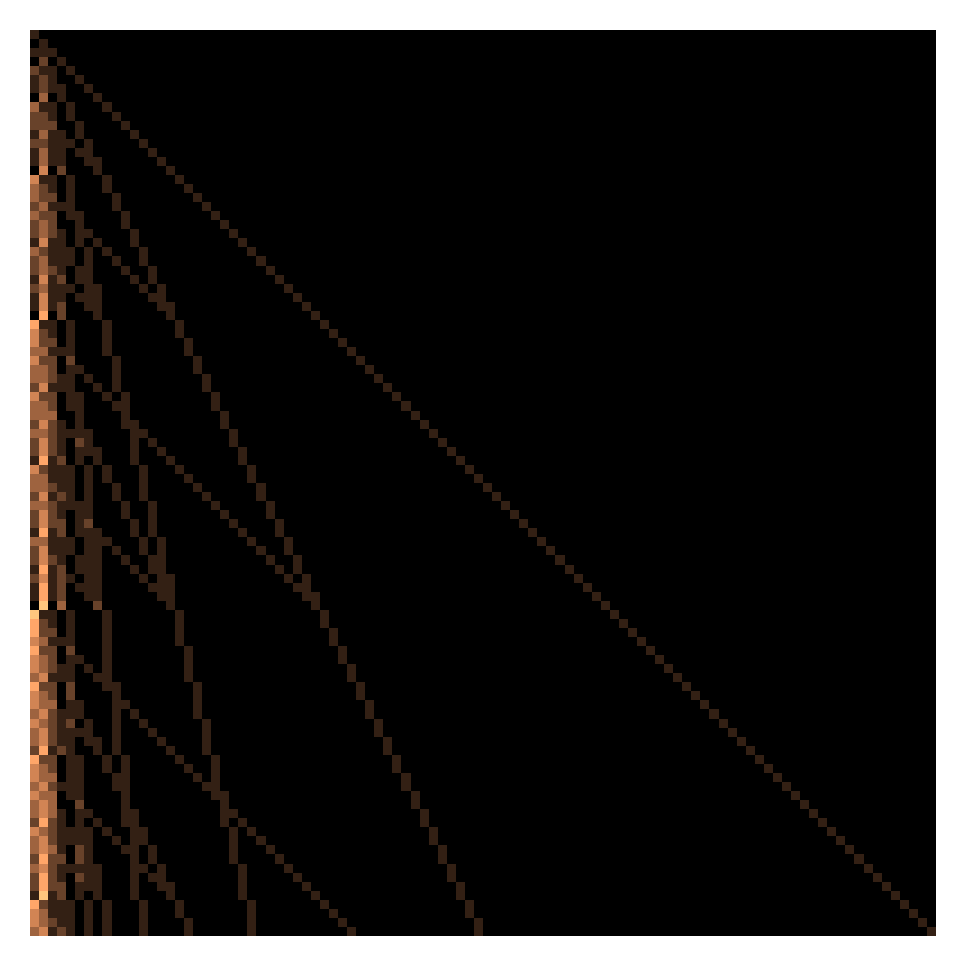

In [12]:
from itertools import chain, combinations

def m_show(m, size = 4, cmap = 'copper'):
    import matplotlib.pyplot as plt
    from numpy import array
    cmaps =  ['binary', 'gist_yarg', 'gist_gray', 'gray', 'bone',
                'pink', 'spring', 'summer', 'autumn', 'winter', 'cool',
                'Wistia', 'hot', 'afmhot', 'gist_heat', 'copper']
    plt.figure(num = None, figsize=(size, size), dpi=300)
    plt.axis('off')
    plot = plt.imshow(array(m), cmap = cmap) #, interpolation='bicubic' )
    plt.show()
    plt.close()

def numberToBase(n, b):
    if n == 0:
        return [0]
    digits = []
    while n:
        digits.append(int(n % b))
        n //= b
    return ''.join(map(str, digits[::-1]))


from tqdm import tqdm 

big_n = 100


def get_matrix_bin():
    n = big_n
    mat =  [[0]*n for i in range(n)]
    for x in tqdm(range(0, n)):
        for y in range(0, n):
            #f = numberToBase((s[x] & s[y]), 2).count(format(y))
            f = format(x, 'b').count(format(y, 'b'))
            mat[x][y] = f
    return mat



# pows = [i for i in range(0, 2**big_n)]
# pows = sorted(pows, key = lambda k: numberToBase(k, 3).count('10'))

adj_m = get_matrix_bin()

m_show(adj_m)




[0, 7, 29, 121, 497, 2017, 8129, 32641, 130817]


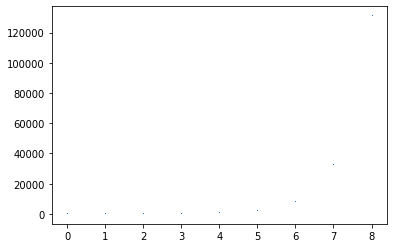

In [22]:
n = 1000
terms = [[format(i, 'b').count(format(j, 'b')) for j in range(0, i+1)] for i in range(0, n)]

def grow_subs(s):
    max_v = s[0]
    out = [0,]
    for i in range(1, len(s)):
        if s[i] > max_v:
            max_v = s[i]
            out.append(i)
    return out

def flatten(t):
    return [item for sublist in t for item in sublist]


terms = grow_subs(flatten(terms))



print(terms[:100])



import matplotlib.pyplot as plt

plt.plot(terms, ',')
plt.show()
